In [1]:
""" Calcuates the next input for black box optimiation function using
a Gaussian Process surrogate with Matern kernel and Expected Improvement
acquisition function.

Change the nu value of the Matern kernel to make it rougher or smoother
Larger nu means smoother kernel. Smaller nu means rougher kernel.

Change the xi value of the acquisition function to make it more or less
exploratory.
Larger xi means more exploratory. Smaller xi means less exploratory (going
towards exploitation).

Change history:
v0.01 - 05/01/2025 - First version, refer description above.
v0.02 - 12/10/2025 - Updated to load input files from google drive and made it
flexible, added code to append week1 inputs and outputs and increased the kernel
length scale bounds from 1e-6 to 1e6 to ensure unimportant features can get very
high scale. Formatted the output print for easier pasting into capstone.
v0.03 - 22/10/2025 - Updated week2 inputs and outputs
v0.04 - 29/10/2025 - Updated week3 inputs and outputs

"""
# Import Libraries

import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C, WhiteKernel
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from scipy.optimize import minimize
from datetime import datetime


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [61]:
# ------------------------------------------------------------
# Set variables
# ------------------------------------------------------------

function = '1'  ## Enter the function number being processed as a string.
path = 'drive/MyDrive/data/' # Enter path to your initial files
given_X = path + 'fn' + function + '_initial_inputs.npy'
given_y = path + 'fn' + function + '_initial_outputs.npy'

today_str = datetime.today().strftime('%Y%m%d')
next_X_file = 'fn' + function + '_next_input_' + today_str + '.npy'

In [62]:

# ------------------------------------------------------------
# Load initial data
# ------------------------------------------------------------
X = np.load(given_X)        # shape (n0, d)
y = np.load(given_y)       # shape (n0,)

print(X)
print(y)
print("Max y = ", y.max())


[[0.31940389 0.76295937]
 [0.57432921 0.8798981 ]
 [0.73102363 0.73299988]
 [0.84035342 0.26473161]
 [0.65011406 0.68152635]
 [0.41043714 0.1475543 ]
 [0.31269116 0.07872278]
 [0.68341817 0.86105746]
 [0.08250725 0.40348751]
 [0.88388983 0.58225397]]
[ 1.32267704e-079  1.03307824e-046  7.71087511e-016  3.34177101e-124
 -3.60606264e-003 -2.15924904e-054 -2.08909327e-091  2.53500115e-040
  3.60677119e-081  6.22985647e-048]
Max y =  7.710875114502849e-16


In [63]:
# ------------------------------------------------------------
# Append new information
# ------------------------------------------------------------
if function == '1':
  X = np.append(X,[[0.701438, 0.897524]], axis=0)  # Append week1 inputs
  y = np.append(y, 4.907008577514035e-55)         # Append week1 outputs
  X = np.append(X,[[0.608788, 0.208839]], axis=0)  # Append week2 inputs
  y = np.append(y, -3.407789887257921e-57)         # Append week2 outputs
  X = np.append(X,[[0.937387, 0.537998]], axis=0)  # Append week3 inputs
  y = np.append(y, -1.8248983945966781e-72)         # Append week3 outputs
elif function == '2':
  X = np.append(X,[[0.695813, 0.000000]], axis=0)  # Append week inputs
  y = np.append(y, 0.6257440183692108)         # Append week1 outputs
  X = np.append(X,[[0.969061, 0.774664]], axis=0)  # Append week2 inputs
  y = np.append(y, 0.033917749094575816)         # Append week2 outputs
  X = np.append(X,[[0.690739, 0.962975]], axis=0)  # Append week3 inputs
  y = np.append(y, 0.6440194651539941)         # Append week3 outputs
elif function == '3':
  X = np.append(X,[[0.000000, 0.000000, 0.000000]], axis=0)  # Append week1 inputs
  y = np.append(y, -0.1755204613669372)         # Append week1 outputs
  X = np.append(X,[[0.999999, 0.183024, 0.788109]], axis=0)  # Append week2 inputs
  y = np.append(y, -0.10594389054163186)         # Append week2 outputs
  X = np.append(X,[[0.937840, 0.999999, 0.405928]], axis=0)  # Append week3 inputs
  y = np.append(y, -0.05889151139553504)         # Append week3 outputs
elif function == '4':
  X = np.append(X,[[0.440415, 0.425453, 0.378353, 0.397106]], axis=0)  # Append week1 inputs
  y = np.append(y, 0.2601025838576061)         # Append week1 outputs
  X = np.append(X,[[0.410011, 0.415255, 0.344454, 0.438808]], axis=0)  # Append week2 inputs
  y = np.append(y, 0.3983591561199096)         # Append week2 outputs
  X = np.append(X,[[0.384038, 0.412994, 0.399499, 0.436890]], axis=0)  # Append week3 inputs
  y = np.append(y, 0.2987152140170406)         # Append week3 outputs
elif function == '5':
  X = np.append(X,[[0.000000, 0.827185, 0.999999, 0.999999]], axis=0)  # Append week1 inputs
  y = np.append(y, 2781.638812419282)         # Append week1 outputs
  X = np.append(X,[[0.058940, 0.195873, 0.872581, 0.998561]], axis=0)  # Append week2 inputs
  y = np.append(y, 848.8896402098709)         # Append week2 outputs
  X = np.append(X,[[0.166206, 0.999999, 0.999999, 0.999999]], axis=0)  # Append week3 inputs
  y = np.append(y, 4444.256290210307)         # Append week3 outputs
elif function == '6':
  X = np.append(X,[[0.464910, 0.242338, 0.574752, 0.999999, 0.000000]], axis=0)  # Append week1 inputs
  y = np.append(y, -0.5265043497038704)         # Append week1 outputs
  X = np.append(X,[[0.537065, 0.317653, 0.626041, 0.898937, 0.148218]], axis=0)  # Append week2 inputs
  y = np.append(y, -0.41510731628352715)         # Append week2 outputs
  X = np.append(X,[[0.455585, 0.174069, 0.999999, 0.999999, 0.292903]], axis=0)  # Append week3 inputs
  y = np.append(y, -1.0104998624615082)         # Append week3 outputs
elif function == '7':
  X = np.append(X,[[0.000000, 0.247036, 0.408965, 0.217149, 0.377534, 0.746590]], axis=0)  # Append week1 inputs
  y = np.append(y, 2.3034568430941222)         # Append week1 outputs
  X = np.append(X,[[0.000000, 0.181841, 0.435826, 0.062982, 0.361647, 0.858489]], axis=0)  # Append week2 inputs
  y = np.append(y, 1.3279380639726712)         # Append week2 outputs
  X = np.append(X,[[0.000000, 0.166738, 0.211207, 0.080984, 0.381370, 0.746608]], axis=0)  # Append week3 inputs
  y = np.append(y, 1.433484749556216)         # Append week3 outputs
elif function == '8':
  X = np.append(X,[[0.060275, 0.000000, 0.134973, 0.000000, 0.999999, 0.404343, 0.057755, 0.516689]], axis=0)  # Append week1 inputs
  y = np.append(y, 9.8814582425914)         # Append week1 outputs
  X = np.append(X,[[0.122654, 0.153991, 0.162413, 0.045600, 0.999999, 0.536650, 0.260832, 0.932950]], axis=0)  # Append week2 inputs
  y = np.append(y, 9.9450768395815)         # Append week2 outputs
  X = np.append(X,[[0.085442, 0.318585, 0.000000, 0.239064, 0.999999, 0.927570, 0.142651, 0.932950]], axis=0)  # Append week3 inputs
  y = np.append(y, 9.6920435401985)         # Append week3 outputs

print(X)
print(y)
print("Max y = ", y.max())

[[0.31940389 0.76295937]
 [0.57432921 0.8798981 ]
 [0.73102363 0.73299988]
 [0.84035342 0.26473161]
 [0.65011406 0.68152635]
 [0.41043714 0.1475543 ]
 [0.31269116 0.07872278]
 [0.68341817 0.86105746]
 [0.08250725 0.40348751]
 [0.88388983 0.58225397]
 [0.701438   0.897524  ]
 [0.608788   0.208839  ]
 [0.937387   0.537998  ]]
[ 1.32267704e-079  1.03307824e-046  7.71087511e-016  3.34177101e-124
 -3.60606264e-003 -2.15924904e-054 -2.08909327e-091  2.53500115e-040
  3.60677119e-081  6.22985647e-048  4.90700858e-055 -3.40778989e-057
 -1.82489839e-072]
Max y =  7.710875114502849e-16


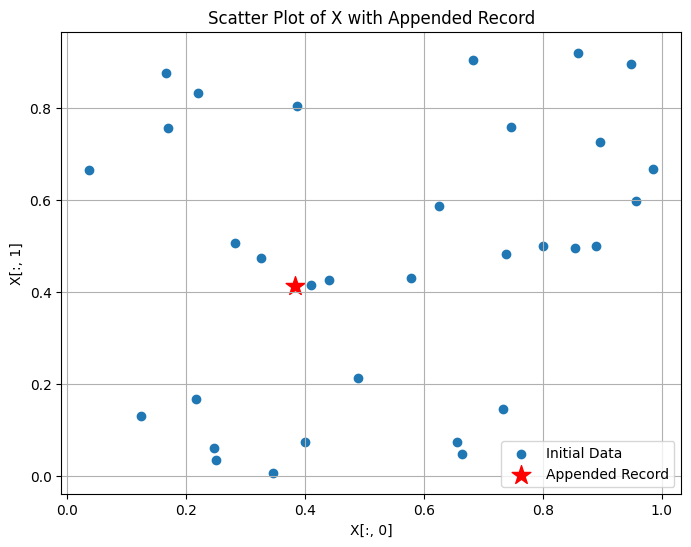

In [41]:
## Optional code cell -- not required to produce the next input query.

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X[:-1, 0], X[:-1, 1], label='Initial Data') # Plot initial data
plt.scatter(X[-1, 0], X[-1, 1], color='red', marker='*', s=200, label='Appended Record') # Plot the appended record as a red star

#plt.scatter(X[:-1, 1], y[:-1], label='Initial Data') # Plot initial data
#plt.scatter(X[-1, 1], y[-1], color='red', marker='*', s=200, label='Appended Record') # Plot the appended record as a red star


plt.xlabel('X[:, 0]')
plt.ylabel('X[:, 1]')

#plt.xlabel('X[:,1]')
#plt.ylabel('y[:]')

plt.title('Scatter Plot of X with Appended Record')
plt.grid(True)
plt.legend() # Add a legend to differentiate the points
plt.show()

In [64]:
# ------------------------------------------------------------
# Normalise inputs and outputs
# ------------------------------------------------------------
x_scaler = StandardScaler()
Xn = x_scaler.fit_transform(X)

y_mean = y.mean()
y_std = y.std() if y.std() > 0 else 1.0
yn = (y - y_mean) / y_std                 # GP works better with normalized target

print("Scaled max y =", yn.max())

# ------------------------------------------------------------
# Fit a Gaussian Process surrogate
# ------------------------------------------------------------
d = X.shape[1]
kernel = C(1.0, (1e-3, 1e3)) * Matern(length_scale=np.ones(d),
                                      length_scale_bounds=(1e-6, 1e6),
                                      nu=2.5)
kernel += WhiteKernel(noise_level=1e-6,
                      noise_level_bounds=(1e-10, 1e1))

gp = GaussianProcessRegressor(kernel=kernel,
                              normalize_y=False,
                              n_restarts_optimizer=10,
                              random_state=0)
gp.fit(Xn, yn)



Scaled max y = 0.28867513459554844


GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=[1, 1], nu=2.5) + WhiteKernel(noise_level=1e-06),
                         n_restarts_optimizer=10, random_state=0)

In [43]:
##Optional code cell introduced to check feature sensitivity

def feature_sensitivity(gp, X_sample):
    # Approximate variance in mean predictions when perturbing each feature
    baseline = gp.predict(X_sample)
    sens = []
    for j in range(X_sample.shape[1]):
        X_perturb = X_sample.copy()
        X_perturb[:, j] += 0.01  # small perturbation
        diff = gp.predict(X_perturb) - baseline
        sens.append(np.mean(np.abs(diff)))
    return np.array(sens)

#importance = feature_sensitivity(gp, X_obs)
#importance /= importance.sum()
#print("Feature importances:", importance)


In [ ]:
## Optional code cell introduced to check feature senitivity
importance = feature_sensitivity(gp, Xn)

for i, imp in enumerate(importance, start=1):
    print(f"Feature {i}: {imp}")

importance /= importance.sum()
print("Feature importances:", importance)
print("\n")
for i, imp in enumerate(importance, start=1):
    print(f"Feature {i}: {imp:.8f}")


Feature 1: 0.0056635222882967864
Feature 2: 0.002025019885408089
Feature 3: 0.006293704735025499
Feature 4: 0.001978303405969939
Feature 5: 0.0010671844494220565
Feature 6: 2.1668169903846104e-12
Feature 7: 0.0035759869655226425
Feature 8: 1.3249591899823697e-11
Feature importances: [2.74878605e-01 9.82841795e-02 3.05464460e-01 9.60167988e-02
 5.17957126e-02 1.05166291e-10 1.73560244e-01 6.43067892e-10]


Feature 1: 0.27487860
Feature 2: 0.09828418
Feature 3: 0.30546446
Feature 4: 0.09601680
Feature 5: 0.05179571
Feature 6: 0.00000000
Feature 7: 0.17356024
Feature 8: 0.00000000


In [65]:
# ------------------------------------------------------------
# Define Expected Improvement acquisition (for maximization)
# ------------------------------------------------------------
f_best = yn.max()
xi = 0.01     # exploration parameter

def predict_raw(x_raw):
    """Predict mean and std in normalized GP space for a raw input x_raw."""
    x = np.atleast_2d(x_raw)
    xn = x_scaler.transform(x)
    mu, sigma = gp.predict(xn, return_std=True)
    return mu.ravel(), sigma.ravel()

def expected_improvement_raw(x_raw, xi=xi):
    """Compute EI for a raw input x_raw."""
    mu, sigma = predict_raw(x_raw)
    sigma = np.maximum(sigma, 1e-9)       # avoid division by zero
    z = (mu - f_best - xi) / sigma
    ei = (mu - f_best - xi) * norm.cdf(z) + sigma * norm.pdf(z)
    return ei.ravel()[0]



In [66]:
# ------------------------------------------------------------
# Search for the next query point
# ------------------------------------------------------------
# Domain is assumed to be [0,1]^d (based on inspection of initial data)
bounds = [(0.0, 1.0)] * d

# Global random search to find good seeds
n_seeds = 2000
rng = np.random.default_rng(1)
candidates = rng.uniform(0.0, 1.0, size=(n_seeds, d))
ei_vals = np.array([expected_improvement_raw(c) for c in candidates])
best_idx = np.argmax(ei_vals)

# Take top few seeds for local optimisation
seed_points = candidates[np.argsort(-ei_vals)[:20]]

best_x = None
best_val = -1.0
for s in seed_points:
    res = minimize(lambda xx: -expected_improvement_raw(xx),
                   x0=s,
                   bounds=bounds,
                   method="L-BFGS-B",
                   options={'maxiter':300})
    if res.success:
        val = -res.fun
        if val > best_val:
            best_val = val
            best_x = res.x.copy()

# Fallback if optimizer fails
if best_x is None:
    best_x = candidates[best_idx]
    best_val = ei_vals[best_idx]

# Meet capstone requirement
epsilon = 1e-6
best_x = np.clip(best_x, 0.0, 1.0 - epsilon)     # ensure in [0,1] i.e begins with 0
best_x = np.round(best_x, 6)           # specified to 6 decimals



In [67]:
# ------------------------------------------------------------
# Report results
# ------------------------------------------------------------
suggested_point = np.atleast_1d(best_x)
mu_s, sigma_s = predict_raw(suggested_point.reshape(1, -1))

# Convert mean/std back to original y-scale
mu_orig = mu_s * y_std + y_mean
sigma_orig = sigma_s * y_std

print("Suggested next query point (raw input space):", '-'.join(map(str, suggested_point)))
print("Expected Improvement at this point (normalized):", best_val)
print("GP predicted mean at this point (original y scale):", mu_orig)
print("GP predicted stddev at this point (original y scale):", sigma_orig)

# Optionally save the suggestion
np.save(next_X_file, suggested_point)

Suggested next query point (raw input space): 0.401144-0.347316
Expected Improvement at this point (normalized): 0.3073234629892425
GP predicted mean at this point (original y scale): [-0.00020041]
GP predicted stddev at this point (original y scale): [0.00098106]
